## Import Librares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# for evaluation
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

## Read Data

In [2]:
df = pd.read_csv("SeoulBikeData.csv", encoding='latin1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['Date'].unique()

array(['01/12/2017', '02/12/2017', '03/12/2017', '04/12/2017',
       '05/12/2017', '06/12/2017', '07/12/2017', '08/12/2017',
       '09/12/2017', '10/12/2017', '11/12/2017', '12/12/2017',
       '13/12/2017', '14/12/2017', '15/12/2017', '16/12/2017',
       '17/12/2017', '18/12/2017', '19/12/2017', '20/12/2017',
       '21/12/2017', '22/12/2017', '23/12/2017', '24/12/2017',
       '25/12/2017', '26/12/2017', '27/12/2017', '28/12/2017',
       '29/12/2017', '30/12/2017', '31/12/2017', '01/01/2018',
       '02/01/2018', '03/01/2018', '04/01/2018', '05/01/2018',
       '06/01/2018', '07/01/2018', '08/01/2018', '09/01/2018',
       '10/01/2018', '11/01/2018', '12/01/2018', '13/01/2018',
       '14/01/2018', '15/01/2018', '16/01/2018', '17/01/2018',
       '18/01/2018', '19/01/2018', '20/01/2018', '21/01/2018',
       '22/01/2018', '23/01/2018', '24/01/2018', '25/01/2018',
       '26/01/2018', '27/01/2018', '28/01/2018', '29/01/2018',
       '30/01/2018', '31/01/2018', '01/02/2018', '02/02

In [7]:
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [8]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [9]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
# Drop columns if deemed unnecessary
columns_to_drop = ['Date', 'Holiday', 'Functioning Day']
df.drop(columns=columns_to_drop , axis = 1 , inplace  = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


## Data Visualization

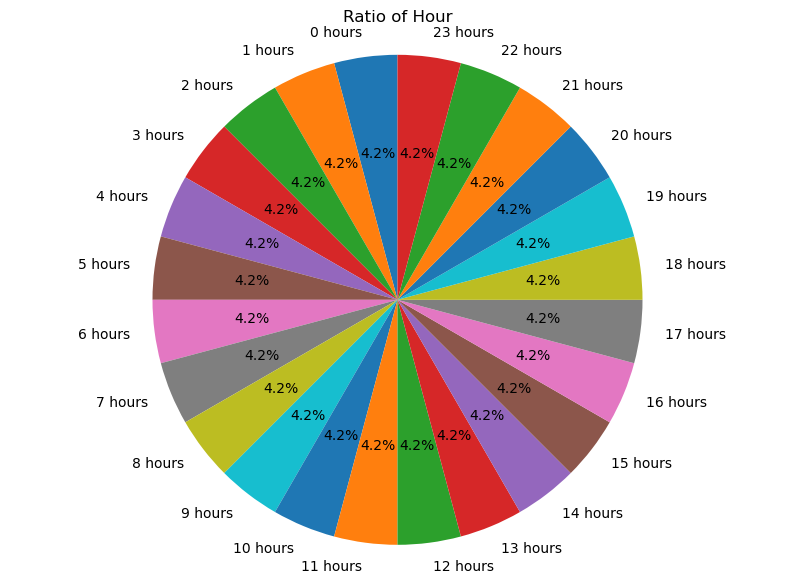

In [12]:
# Show number value every hour
hour_counts = df['Hour'].value_counts().sort_index()
hour_labels = [f"{hour} hours" for hour in hour_counts.index]
plt.figure(figsize=(10, 7))
plt.pie(hour_counts, labels=hour_labels, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of Hour')
plt.axis('equal')  
plt.show()

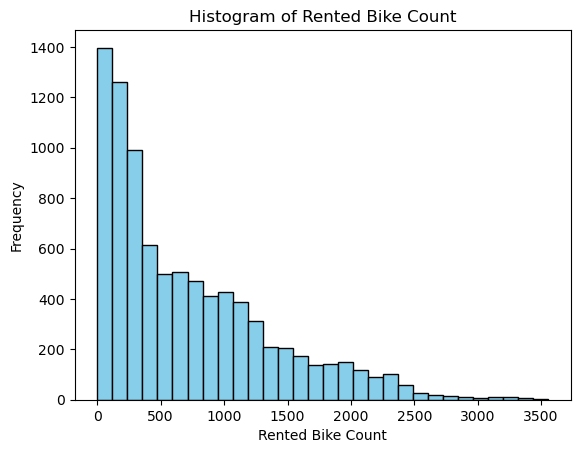

In [13]:
#Histogram of Rented Bike Count

plt.hist(df['Rented Bike Count'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.title('Histogram of Rented Bike Count')
plt.show()

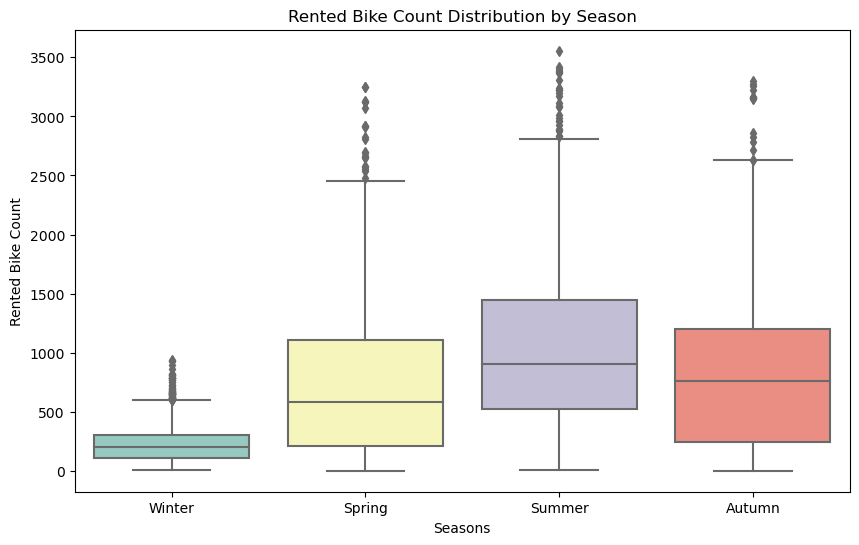

In [14]:
# Boxplot of Rented Bike Count by Season
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Rented Bike Count', data=df, palette='Set3')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count Distribution by Season')
plt.show()

## Data Preprocessiong 

In [22]:
# handel categorical Data
ordinal_encoder = OrdinalEncoder()

In [17]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [24]:
seasons_column = df[['Seasons']]

encoder = ordinal_encoder.fit_transform(seasons_column)

# Replace the original 'Seasons' column with the encoded values
df['Seasons'] = encoder

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 752.9 KB


In [28]:
y = df["Rented Bike Count"]
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [29]:
x = df.drop('Rented Bike Count', axis = 1)
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3.0


In [30]:
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size = 0.3 , random_state = 42)

## Model Training

In [35]:
def evaluate_model(actual, predicted):
    MAE = mean_absolute_error(actual, predicted)
    MSE = mean_squared_error(actual, predicted)
    RMSE = np.sqrt(mean_squared_error(actual, predicted))  # Corrected typo here
    R2_Score = r2_score(actual, predicted)
    return MAE, MSE, RMSE, R2_Score

In [36]:
models = {
    "Linear Regression" :LinearRegression(),
    "KNN Regressor" : KNeighborsRegressor(),
    "Desision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "XGB Model" : XGBRegressor()
}

In [37]:
models_list = []
r2_list = []

In [38]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    
    # model prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #model evaluation
    Train_MAE, Train_MSE, Train_RMSE, Train_R2 = evaluate_model(y_train, y_train_pred)
    Test_MAE, Test_MSE, Test_RMSE, Test_R2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print("Model Training Preformance: ")
    print("Mean Absolute Error = " , Train_MAE)
    print("Mean Squared  Error = ", Train_MSE)
    print("Root Mean Squared  Error = ", Train_RMSE)
    print("R2 Score Error = ", Train_R2)
    
    print("________________________________________")
    
    print("Model test Preformance: ")
    print("Mean Absolute Error = " , Test_MAE)
    print("Mean Squared  Error = ", Test_MSE)
    print("Root Mean Squared  Error = ", Test_RMSE)
    print("R2 Score Error = ", Test_R2)
    
    r2_list.append(Test_R2)
    
    


Linear Regression
Model Training Preformance: 
Mean Absolute Error =  340.4032132480904
Mean Squared  Error =  216115.93896179003
Root Mean Squared  Error =  464.88271527535846
R2 Score Error =  0.48373063011209894
________________________________________
Model test Preformance: 
Mean Absolute Error =  341.47821823361534
Mean Squared  Error =  214743.54825233406
Root Mean Squared  Error =  463.4043032302722
R2 Score Error =  0.47596697686521827
KNN Regressor
Model Training Preformance: 
Mean Absolute Error =  241.95319634703196
Mean Squared  Error =  125486.36599478147
Root Mean Squared  Error =  354.2405482081088
R2 Score Error =  0.7002314247950842
________________________________________
Model test Preformance: 
Mean Absolute Error =  297.2305175038052
Mean Squared  Error =  195352.06774733638
Root Mean Squared  Error =  441.98650177051377
R2 Score Error =  0.5232874958507412
Desision Tree
Model Training Preformance: 
Mean Absolute Error =  0.0
Mean Squared  Error =  0.0
Root Mean S

In [42]:
scores_df = pd.DataFrame(list(zip(models_list , r2_list)) , 
                         columns = ['Model Name' ,'R2_Score']).sort_values(by = ['R2_Score'], ascending = False)

In [43]:
scores_df

,Model Name,R2_Score
3,Random Forest,0.783675
4,XGB Model,0.774674
2,Desision Tree,0.558113
1,KNN Regressor,0.523287
0,Linear Regression,0.475967


In [44]:
model = RandomForestRegressor()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

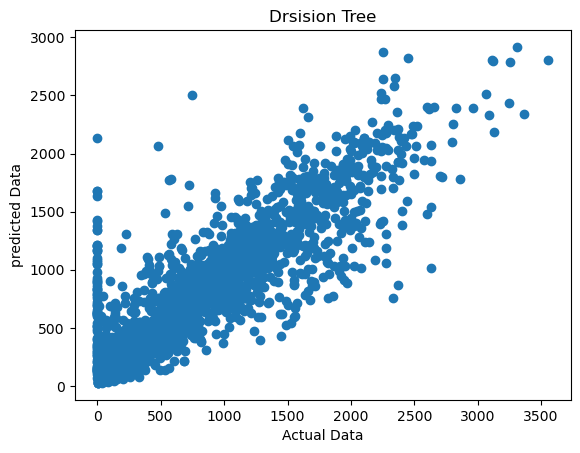

In [45]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Data")
plt.ylabel("predicted Data")
plt.title("Drsision Tree")
plt.show()

<AxesSubplot:xlabel='Rented Bike Count'>

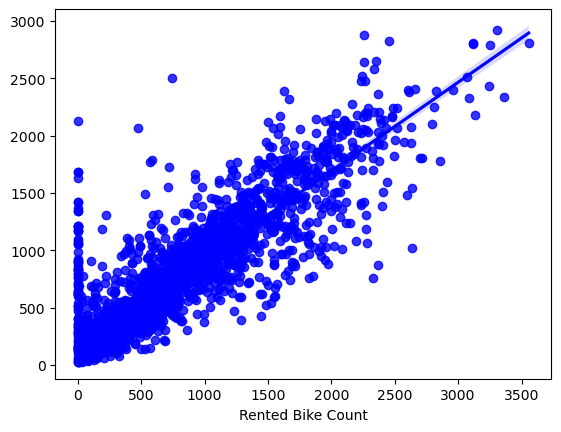

In [46]:
sns.regplot(x = y_test , y = y_pred , color = 'blue')

In [47]:
prediction_df= pd.DataFrame({'Actual Values': y_test,
                             'Predicted Values' : y_pred,
                             'Diffirance' : y_test  - y_pred})

In [48]:
prediction_df

,Actual Values,Predicted Values,Diffirance
6056,1728,1601.89,126.11
5556,822,720.48,101.52
5990,658,690.65,-32.65
7674,2716,1801.41,914.59
3319,1083,716.59,366.41
...,...,...,...
3404,1581,1642.02,-61.02
1912,404,408.96,-4.96
3692,1401,1248.07,152.93
599,169,220.60,-51.60
